# Tarea 1: Normalización y Estandarización

### Integrantes:

    - Javier Vega 
    - Erick Calvo


##### Normalización y Estandarización del set de datos: daily-min-temperatures.csv

    1. Forma Automática: mediante el uso de librerías (scikit-learn).
    2. Forma Manual: mediante el uso de las fórmulas matemáticas.

In [1]:
#Importar todas las librerias requeridas

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch 
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Cargar los datos 
path = "daily-min-temperatures.txt"

datos_df = pd.read_csv(path, delimiter=',')

#Verificar los datos cargados
print(datos_df)

print(datos_df.columns)

#Selecionar datos a estadarizar-normalizar
np_datos = np.array(datos_df.iloc[:,-1:])
print(np_datos)

            Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]
Index(['Date', 'Temp'], dtype='object')
[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


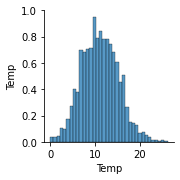

In [2]:
#Gráfica de pares para los datos:

sns.pairplot(datos_df)

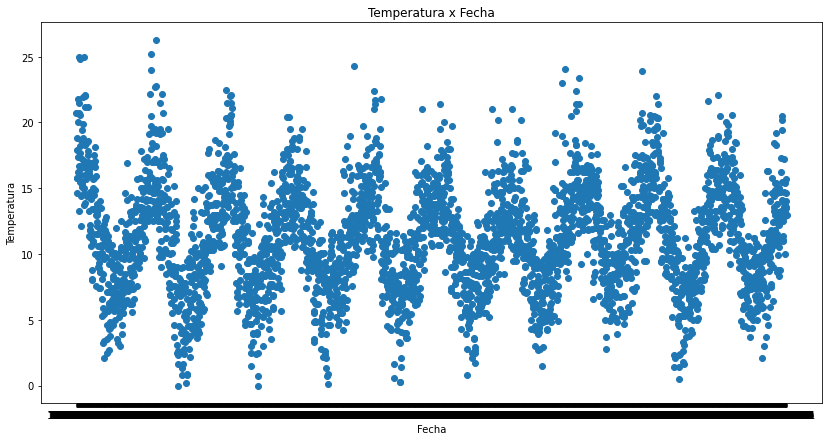

In [3]:
#Gráfica de Dispersión para los datos:

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(14,7))
    plt.scatter(x=datos_df[col_x],y=datos_df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
    
plot_data(datos_df,'Date', 'Temp', 'Fecha','Temperatura','Temperatura x Fecha')    


#### Para la Estandarizacion automatica usamos la funcion Standard Scaler de  (skit-learn)

In [4]:
#Estandarización Automática
# Para este proposito usamos el Standard Scaler function de 
scaler = StandardScaler()
scaler.fit(np_datos)

datos_estandarizados = scaler.transform(np_datos)

print(datos_estandarizados)

[[2.33888328]
 [1.65113873]
 [1.87219948]
 ...
 [0.5703973 ]
 [1.11076801]
 [0.44758577]]


#### Para la Normalizacion automatica usamos las funciones Min Max Scaler y transform de  (skit-learn)

In [5]:
#Normalización Automática

scaler = MinMaxScaler()
scaler.fit(np_datos)

datos_normalizados = scaler.transform(np_datos)

print(datos_normalizados)

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]


#### Estandarizacion Manual
La estandarizacion de la puntuacion Z se estandariza en funcion de la normalizacion de la media y la desviacion estandard de los datos originales, y su formula de trasnformacion es 

$$
z={\frac {x-\mu}{\sigma}}
$$

Donde Z son los datos transformados, X son los datos antes de la transformacion, ${\mu}$ es  la media de los datos de grupo completo, ${\sigma}$ es la desviacion estandard de los datos de todo el grupo

In [6]:
#Estandarización manual:

estandarización_manual = (np_datos - np_datos.mean()) / np_datos.std(ddof=1)

print(estandarización_manual)

[[2.33856287]
 [1.65091253]
 [1.871943  ]
 ...
 [0.57031915]
 [1.11061584]
 [0.44752445]]


#### Normalizacion Manual
El metodo de estandarizacion MIN-MAX transformara linealmente los datos originales, y su formula de conversion es: 
$$
z={\frac {x-x_{min}}{x_{max}-x_{min}}}
$$ 



In [7]:
#Normalización manual:

normalización_manual = (np_datos - np_datos.min()) / (np_datos.max() - np_datos.min())

print(normalización_manual)

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]
